In [1]:
import pandas as pd

df = pd.read_csv("greek_proverbs_human_clustering.csv")
df = df.set_index("text")

# ensure all clusters are categoricals
for col_name in df.keys():
    df[col_name] = df[col_name].factorize()[0]

df

,f3352321,f3352310,f3352311,f3352316,f3352318,f3352314,f3352315,f3352301,f3352308,f3352307
text,,,,,,,,,,
Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,0,0,0,0,0,0,0,0,0,0
Τα 'θελες και τα 'παθες,0,1,1,1,1,1,1,1,0,1
"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",1,0,2,2,0,2,2,1,0,2
"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντάρι ψόφιο, χαρτί μουρδουλωμένο",1,0,3,2,0,2,3,2,1,3
"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε",2,2,3,3,0,1,4,0,2,4
...,...,...,...,...,...,...,...,...,...,...
"Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'",3,0,13,0,1,6,2,4,0,17
Θέλει κι ο Μούτσιος καφέ!,0,1,10,4,0,5,7,3,0,3
Ξέρεις και συ που πάει του χωριού η αγγέλη,0,1,1,0,0,3,5,2,1,2


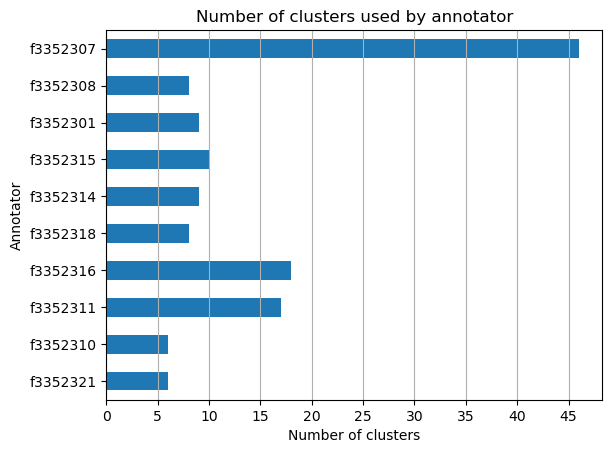

In [2]:
import matplotlib.pyplot as plt
import numpy as np


unique_series = df.apply(lambda x: len(x.unique()))
unique_series.plot.barh(xlabel="Number of clusters",
                        ylabel="Annotator",
                        title="Number of clusters used by annotator",
                        xticks=np.arange(0, max(unique_series), 5))
plt.grid(axis="x")
plt.show()

## Assessing the human-based grouping

In this section we want to  quantify and assess the clustering quality of our dataset. We will thus use two metrics:

* [Normalized Mutual Information](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf): *Mutual Information* is a metric measuring how similar two distributions are to each other. This metric can range from $[0, \infty]$, although typically values $>2$ are rare. In order to more easily interpret it, we can use *Normalized Mutual Information* (NMI), which "compresses" these values to $[0,1]$, where $0$ means no correlation, and $1$ indicates perfect correlation. An imporant note is that if the data are **perfectly similar** the NMI score would be **zero** [1][zero_corr].

* [Adjusted Mutual Information](https://en.wikipedia.org/wiki/Adjusted_mutual_information)(AMI): Which computes Mutual Information, while taking into account the fact that some labels may be similar by random chance. Thus its range is from $[-\infty, 1]$, but the expected (mean) value for uncorrelated labels should be close to 0.

We will thus compute both of these metrics for each annotator pair.

[zero_corr]: https://stats.stackexchange.com/questions/161429/why-would-perfectly-similar-data-have-0-mutual-information

In [3]:
import warnings
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from itertools import combinations


comparisons = []

# get all combinations between annotators
annotators = list(df.keys())
pairwise_annotators = combinations(annotators, 2)

for a1, a2 in list(pairwise_annotators):
    # catch warnings about deprecated dependencies
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        k = normalized_mutual_info_score(df[a1], df[a2])
        k_adj = adjusted_mutual_info_score(df[a1], df[a2])
        
    comparisons.append((a1, a2, k, k_adj))
    
comp_df = pd.DataFrame(comparisons, columns=["annotator1", "annotator2", "mutual_info", "adj_mutual_info"])
comp_df.sample(5)

,annotator1,annotator2,mutual_info,adj_mutual_info
13,f3352310,f3352315,0.136500,0.006375
0,f3352321,f3352310,0.300340,0.231844
38,f3352314,f3352307,0.492418,0.096086
12,f3352310,f3352314,0.213455,0.105864
44,f3352308,f3352307,0.417790,0.010744


In order to interpret these metrics it would be useful to plot them.

If the clusters were indeed uncorrelated we would expect:
* The NMI plot to be right skewed ("leaning" heavily towards $0$)
* The AMI plot to be normally distributed around $0$

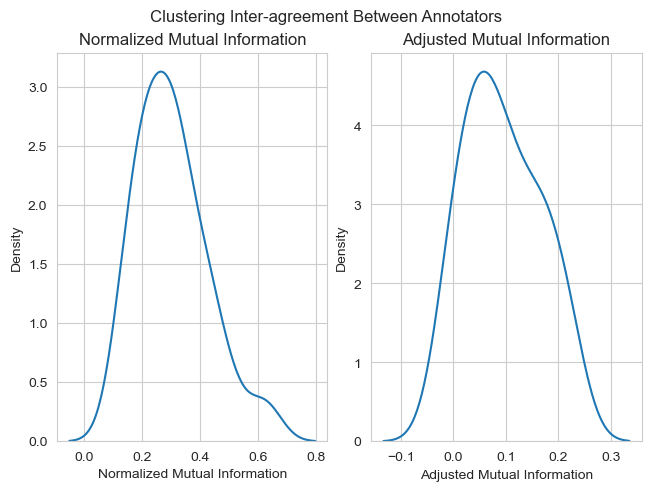

In [4]:
import seaborn as sns


sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout = True)
fig.suptitle("Clustering Inter-agreement Between Annotators")

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    sns.kdeplot(comp_df.mutual_info, ax=ax1)
    ax1.set(xlabel="Normalized Mutual Information", title="Normalized Mutual Information")

    sns.kdeplot(comp_df.adj_mutual_info, ax=ax2)
    ax2.set(xlabel="Adjusted Mutual Information", title="Adjusted Mutual Information")

plt.show()

Instead we observe that:
* The NMI plot is distributed around $0.3$ with a slight right tail
* The AMI plot is distributed around $0.08$

This would suggest an almost definite, albeit slight, non-random correlation between our clusters. We can verify what we infered from the graph by looking at the statistics of our two distributions:

In [5]:
comp_df.mutual_info.describe()

count    45.000000
mean      0.303087
std       0.121936
min       0.119769
25%       0.213455
50%       0.300222
75%       0.360615
max       0.626738
Name: mutual_info, dtype: float64

In [6]:
comp_df.adj_mutual_info.describe()

count    45.000000
mean      0.094371
std       0.072597
min      -0.031303
25%       0.043628
50%       0.087573
75%       0.153690
max       0.233746
Name: adj_mutual_info, dtype: float64

Note the non-zero mean for the AMI, and the significant $0.3$ mean for the NMI. 

The question thus is, why is there a (most likely) statistically significant correlation between clusters, if the annotators were given no instructions on the size or nature of their clusters? One likely explanation could be that the clusters were serially assigned, meaning that since the proverbs were given in the same order, some annotators may have assigned the first clusters to the same meanings.

To investigate this hypothesis we can find the annotators with the largest AMI.

In [7]:
sorted_comp_df = comp_df.sort_values("adj_mutual_info", ascending=False)
sorted_comp_df.head()

,annotator1,annotator2,mutual_info,adj_mutual_info
4,f3352321,f3352314,0.327652,0.233746
0,f3352321,f3352310,0.300340,0.231844
21,f3352311,f3352301,0.413793,0.210259
27,f3352316,f3352301,0.415680,0.207382
17,f3352311,f3352316,0.518273,0.205160


In [8]:
best_pair = sorted_comp_df.iloc[0]
best_pair_df = df[[best_pair.annotator1, best_pair.annotator2]].reset_index()
best_pair_df

,text,f3352321,f3352314
0,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,0,0
1,Τα 'θελες και τα 'παθες,0,1
2,"Αδειανός μασκαράς, παραχέρ 'τ' χουριού",1,2
3,"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντ...",1,2
4,"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε",2,1
...,...,...,...
95,"Σαράντα καλόγεροι, ο καθένας με τον πόνο τ'",3,6
96,Θέλει κι ο Μούτσιος καφέ!,0,5
97,Ξέρεις και συ που πάει του χωριού η αγγέλη,0,3
98,Επήα να κόψω τ' αυτιά και 'βαλα και κέρατα,0,2


In [9]:
best_pair_df[best_pair_df[best_pair.iloc[0]] == best_pair_df[best_pair.iloc[1]]]

,text,f3352321,f3352314
0,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει,0,0
9,Στού Μπαλίκ Παζάρ ένας παπάς κρέμιτι,3,3
10,"Τρεις στα Γέννα, τρεις τα Φώτα τσ' έξη στην Αν...",3,3
51,Μόνον εις τους πλουσίους και τους τιμίους δανε...,0,0
63,Να καναν οι μύγες μέλι τρεις οκάδες στον παρά,0,0


Which seems to confirm that the annotators chose the same clusters early on (here clusters 0 and 3), and thus subsequent classifications with those clusters remained similar. The lack of agreeement elsewhere between the two most "agreeable" annotators of our dataset however means this pattern probably doesn't hold for many clusters and thus may not be relied upon.

## Estimating the ground truth

We can estimate the ground truth that resulted from our clustering by computing how many annotators assigned each pair of proverbs to the same cluster. 

We thus compute the following $NxN$ diagonal matrix $A$ where the $A[i,j]$ value represents the agreement between the $i$th and $j$th proverbs.

In [10]:
comparisons = []

# UTF-8 indexing doesn't work, we will thus use serial IDs and convert them back to strings later
for a1, a2 in combinations(np.arange(0, len(df.index), 1), 2):
    comparisons.append((a1, a2, np.mean(df.iloc[a1] == df.iloc[a2])*100))
    
proverb_df = pd.DataFrame(comparisons, columns=["proverb1", "proverb2", "agreement"])
proverb_df = proverb_df.pivot(index="proverb2", columns="proverb1", values="agreement")
proverb_df

proverb2,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
proverb1,,,,,,,,,,,,,,,,,,,,,
0,20.0,30.0,20.0,20.0,30.0,20.0,30.0,30.0,10.0,10.0,...,10.0,0.0,30.0,10.0,20.0,30.0,30.0,30.0,30.0,40.0
1,NaN,20.0,0.0,10.0,20.0,10.0,0.0,30.0,0.0,10.0,...,0.0,20.0,30.0,20.0,20.0,20.0,30.0,30.0,20.0,20.0
2,NaN,NaN,50.0,10.0,40.0,20.0,0.0,40.0,20.0,10.0,...,10.0,20.0,40.0,40.0,20.0,30.0,20.0,20.0,30.0,20.0
3,NaN,NaN,NaN,20.0,30.0,20.0,10.0,20.0,10.0,10.0,...,10.0,0.0,10.0,20.0,10.0,10.0,20.0,30.0,20.0,30.0
4,NaN,NaN,NaN,NaN,10.0,40.0,30.0,10.0,10.0,10.0,...,10.0,40.0,0.0,10.0,40.0,0.0,10.0,10.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,20.0,10.0,10.0,20.0
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,20.0


Obviously, it's very hard to interpret a numerical matrix, especially one with such size. We would like to build a figure that summarizes the results of our computation. We: 

* use a heatmap, since it is essentially an auto-correlation matrix
* disable the grid in order to focus the reader's attention to the lower diagonal matrix instead of the empty values
* add the same label in the x and y axes to clarify that this is an auto-correlation matrix
* add a label to the color map in order to define the values used in the graph
* include a caption which further explains the graph's interpretation to the reader
* replace the texts with unique IDs for readability

Additionally, we also:
* choose a color map which "groups" the values into different colors, while also maintaining a continuous gradient between values of the same group. Thus it is easy to distinguish a 60% from a 20% agreement pair (distinct color palletes), while also being possible to distinguish individual % values from the 60% group (continuous color pallete).
* attach a full table where an interested reader can match the afforementioned IDs to the actual proverbs, below the graph

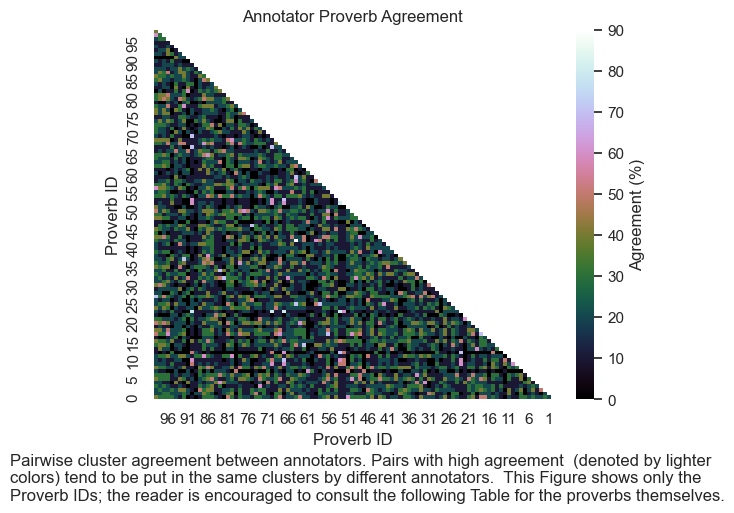

In [21]:
import textwrap


# disable grid
sns.set_theme(style="white")

sns.heatmap(proverb_df, 
            cmap=sns.color_palette("cubehelix", as_cmap=True),
            xticklabels=5,
            yticklabels=5,
            cbar_kws={'label': "Agreement (%)"})

plt.title("Annotator Proverb Agreement")
plt.xlabel("Proverb ID")
plt.ylabel("Proverb ID")

caption_text = """Pairwise cluster agreement between annotators. Pairs with high agreement 
(denoted by lighter colors) tend to be put in the same clusters by different annotators. 
This Figure shows only the Proverb IDs; the reader is encouraged to consult the following
Table for the proverbs themselves.
"""
caption = textwrap.fill(caption_text, width=100)
plt.figtext(-0.1, -0.1, caption)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [19]:
from IPython.display import HTML


HTML(df.reset_index().loc[:, ["text"]].to_html())

,text
0,Όποιος δεν τον ξέρ΄ ακριβά τον αγοράζει
1,Τα 'θελες και τα 'παθες
2,"Αδειανός μασκαράς, παραχέρ 'τ' χουριού"
3,"Ξεπεσομένος άρχοντας, ζωντανοκολασμένος, λιοντάρι ψόφιο, χαρτί μουρδουλωμένο"
4,"Κάλλιο γαιδουρόδερνε, παρά γαιδουρογύρευε"
5,Εφτό σύρνεται
6,"Φύϊτι να μη σας κοιτιλήση του βώδι – Αμ' που 'νιν, πρέ του βώδιν; - Ε θουράτι του σκοινίν του πάου να του φέρου;"
7,Άφσ' τσου πλούσους να σωδιάζουν για τη φτώχεια απανωτιάζουν
8,Η παλαβάδα 'νι 'κατό λουγιώ στού κόσμου
9,Στού Μπαλίκ Παζάρ ένας παπάς κρέμιτι
